# 데이터 호출

In [ ]:
import gdown

file_ids = {"data_visualization.csv": "1Zyq3ju8RMuI9srKDN42M0UwNXrFpYFBY"}

for filename, file_id in file_ids.items():
    url = f"https://drive.google.com/uc?export=download&id={file_id}"
    gdown.download(url, filename, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1Zyq3ju8RMuI9srKDN42M0UwNXrFpYFBY
From (redirected): https://drive.google.com/uc?export=download&id=1Zyq3ju8RMuI9srKDN42M0UwNXrFpYFBY&confirm=t&uuid=32c1dd5c-6b08-4847-87fb-53ee12ad77d3
To: /content/data_visualization.csv
100%|██████████| 1.46G/1.46G [00:09<00:00, 151MB/s]


In [ ]:
import pandas as pd

df = pd.read_csv('data_visualization.csv')
df.info()

<ipython-input-2-40682c350eef>:3: DtypeWarning: Columns (11,12,14,15,17,18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data_visualization.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6170813 entries, 0 to 6170812
Data columns (total 21 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   ID                    int64 
 1   Case Number           object
 2   Date                  object
 3   Block                 object
 4   IUCR                  object
 5   Primary Type          object
 6   Description           object
 7   Location Description  object
 8   Arrest                bool  
 9   Domestic              bool  
 10  Beat                  int64 
 11  District              object
 12  Ward                  object
 13  FBI Code              object
 14  X Coordinate          object
 15  Y Coordinate          object
 16  Year                  int64 
 17  Latitude              object
 18  Longitude             object
 19  Location              object
 20  Community Area Code   object
dtypes: bool(2), int64(3), object(16)
memory usage: 906.3+ MB


# 전처리

## 데이터 정리

In [ ]:
# 결측치가 있는 행을 unknown으로 채우고 수량적인 의미가 없는 ward와 community area의 카테고리화 진행
df['Community Area Code'] = df['Community Area Code'].replace({'unknown' : 0})
df['Community Area Code'].value_counts()

df['Community Area Code'] = df['Community Area Code'].astype('category')
df['Beat'] = df['Beat'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6170813 entries, 0 to 6170812
Data columns (total 21 columns):
 #   Column                Dtype   
---  ------                -----   
 0   ID                    int64   
 1   Case Number           object  
 2   Date                  object  
 3   Block                 object  
 4   IUCR                  object  
 5   Primary Type          object  
 6   Description           object  
 7   Location Description  object  
 8   Arrest                bool    
 9   Domestic              bool    
 10  Beat                  category
 11  District              object  
 12  Ward                  object  
 13  FBI Code              object  
 14  X Coordinate          object  
 15  Y Coordinate          object  
 16  Year                  int64   
 17  Latitude              object  
 18  Longitude             object  
 19  Location              object  
 20  Community Area Code   category
dtypes: bool(2), category(2), int64(2), object(15)
memory u

In [ ]:
df.isna().sum()

# 결측치 없음 확인

,0
ID,0
Case Number,0
Date,0
Block,0
IUCR,0
Primary Type,0
Description,0
Location Description,0
Arrest,0
Domestic,0


In [ ]:
df_y = df.copy()
df_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6170813 entries, 0 to 6170812
Data columns (total 21 columns):
 #   Column                Dtype   
---  ------                -----   
 0   ID                    int64   
 1   Case Number           object  
 2   Date                  object  
 3   Block                 object  
 4   IUCR                  object  
 5   Primary Type          object  
 6   Description           object  
 7   Location Description  object  
 8   Arrest                bool    
 9   Domestic              bool    
 10  Beat                  category
 11  District              object  
 12  Ward                  object  
 13  FBI Code              object  
 14  X Coordinate          object  
 15  Y Coordinate          object  
 16  Year                  int64   
 17  Latitude              object  
 18  Longitude             object  
 19  Location              object  
 20  Community Area Code   category
dtypes: bool(2), category(2), int64(2), object(15)
memory u

In [ ]:
# 문자형 자료가 섞여 있으면 도식화가 어려워 숫자형 자료로 전환
df_y['Community Area Code'] = pd.to_numeric(df_y['Community Area Code'], errors='coerce')
df_y['Latitude'] = pd.to_numeric(df_y['Latitude'], errors='coerce')
df_y['Longitude'] = pd.to_numeric(df_y['Longitude'], errors='coerce')
df_y['Ward'] = pd.to_numeric(df_y['Ward'], errors='coerce')

In [ ]:
# 결측치를 대신해 들어간 unknown은 코드 0(위치 불명)으로 대체
import numpy as np

# df_y['Community Area Code'].unique()  # 이미 코드 0으로 대체돼 있음

df_y['Ward'] = df_y['Ward'].replace(np.nan, 0)

# 위치 결측치를 양쪽에서 모두 0으로 변경

df_y['Ward'] = df_y['Ward'].astype('int')


In [ ]:
vc = df_y['Year'].value_counts()
# year 칼럼에 41이라는 잘못된 값이 있어 발생 연도인 2001로 대체

df_y[df_y['Year'] == 41]       # 1513589행의 year 칼럼에 41이 존재
df_y.iloc[1513589, 16] = 2001

vcy = df_y['Year'].value_counts()
vcy

,count
Year,
2002,486631
2001,485694
2003,474934
2005,453666
2006,448037
2007,436924
2008,426964
2009,392556
2004,386998


## 1차 시각화

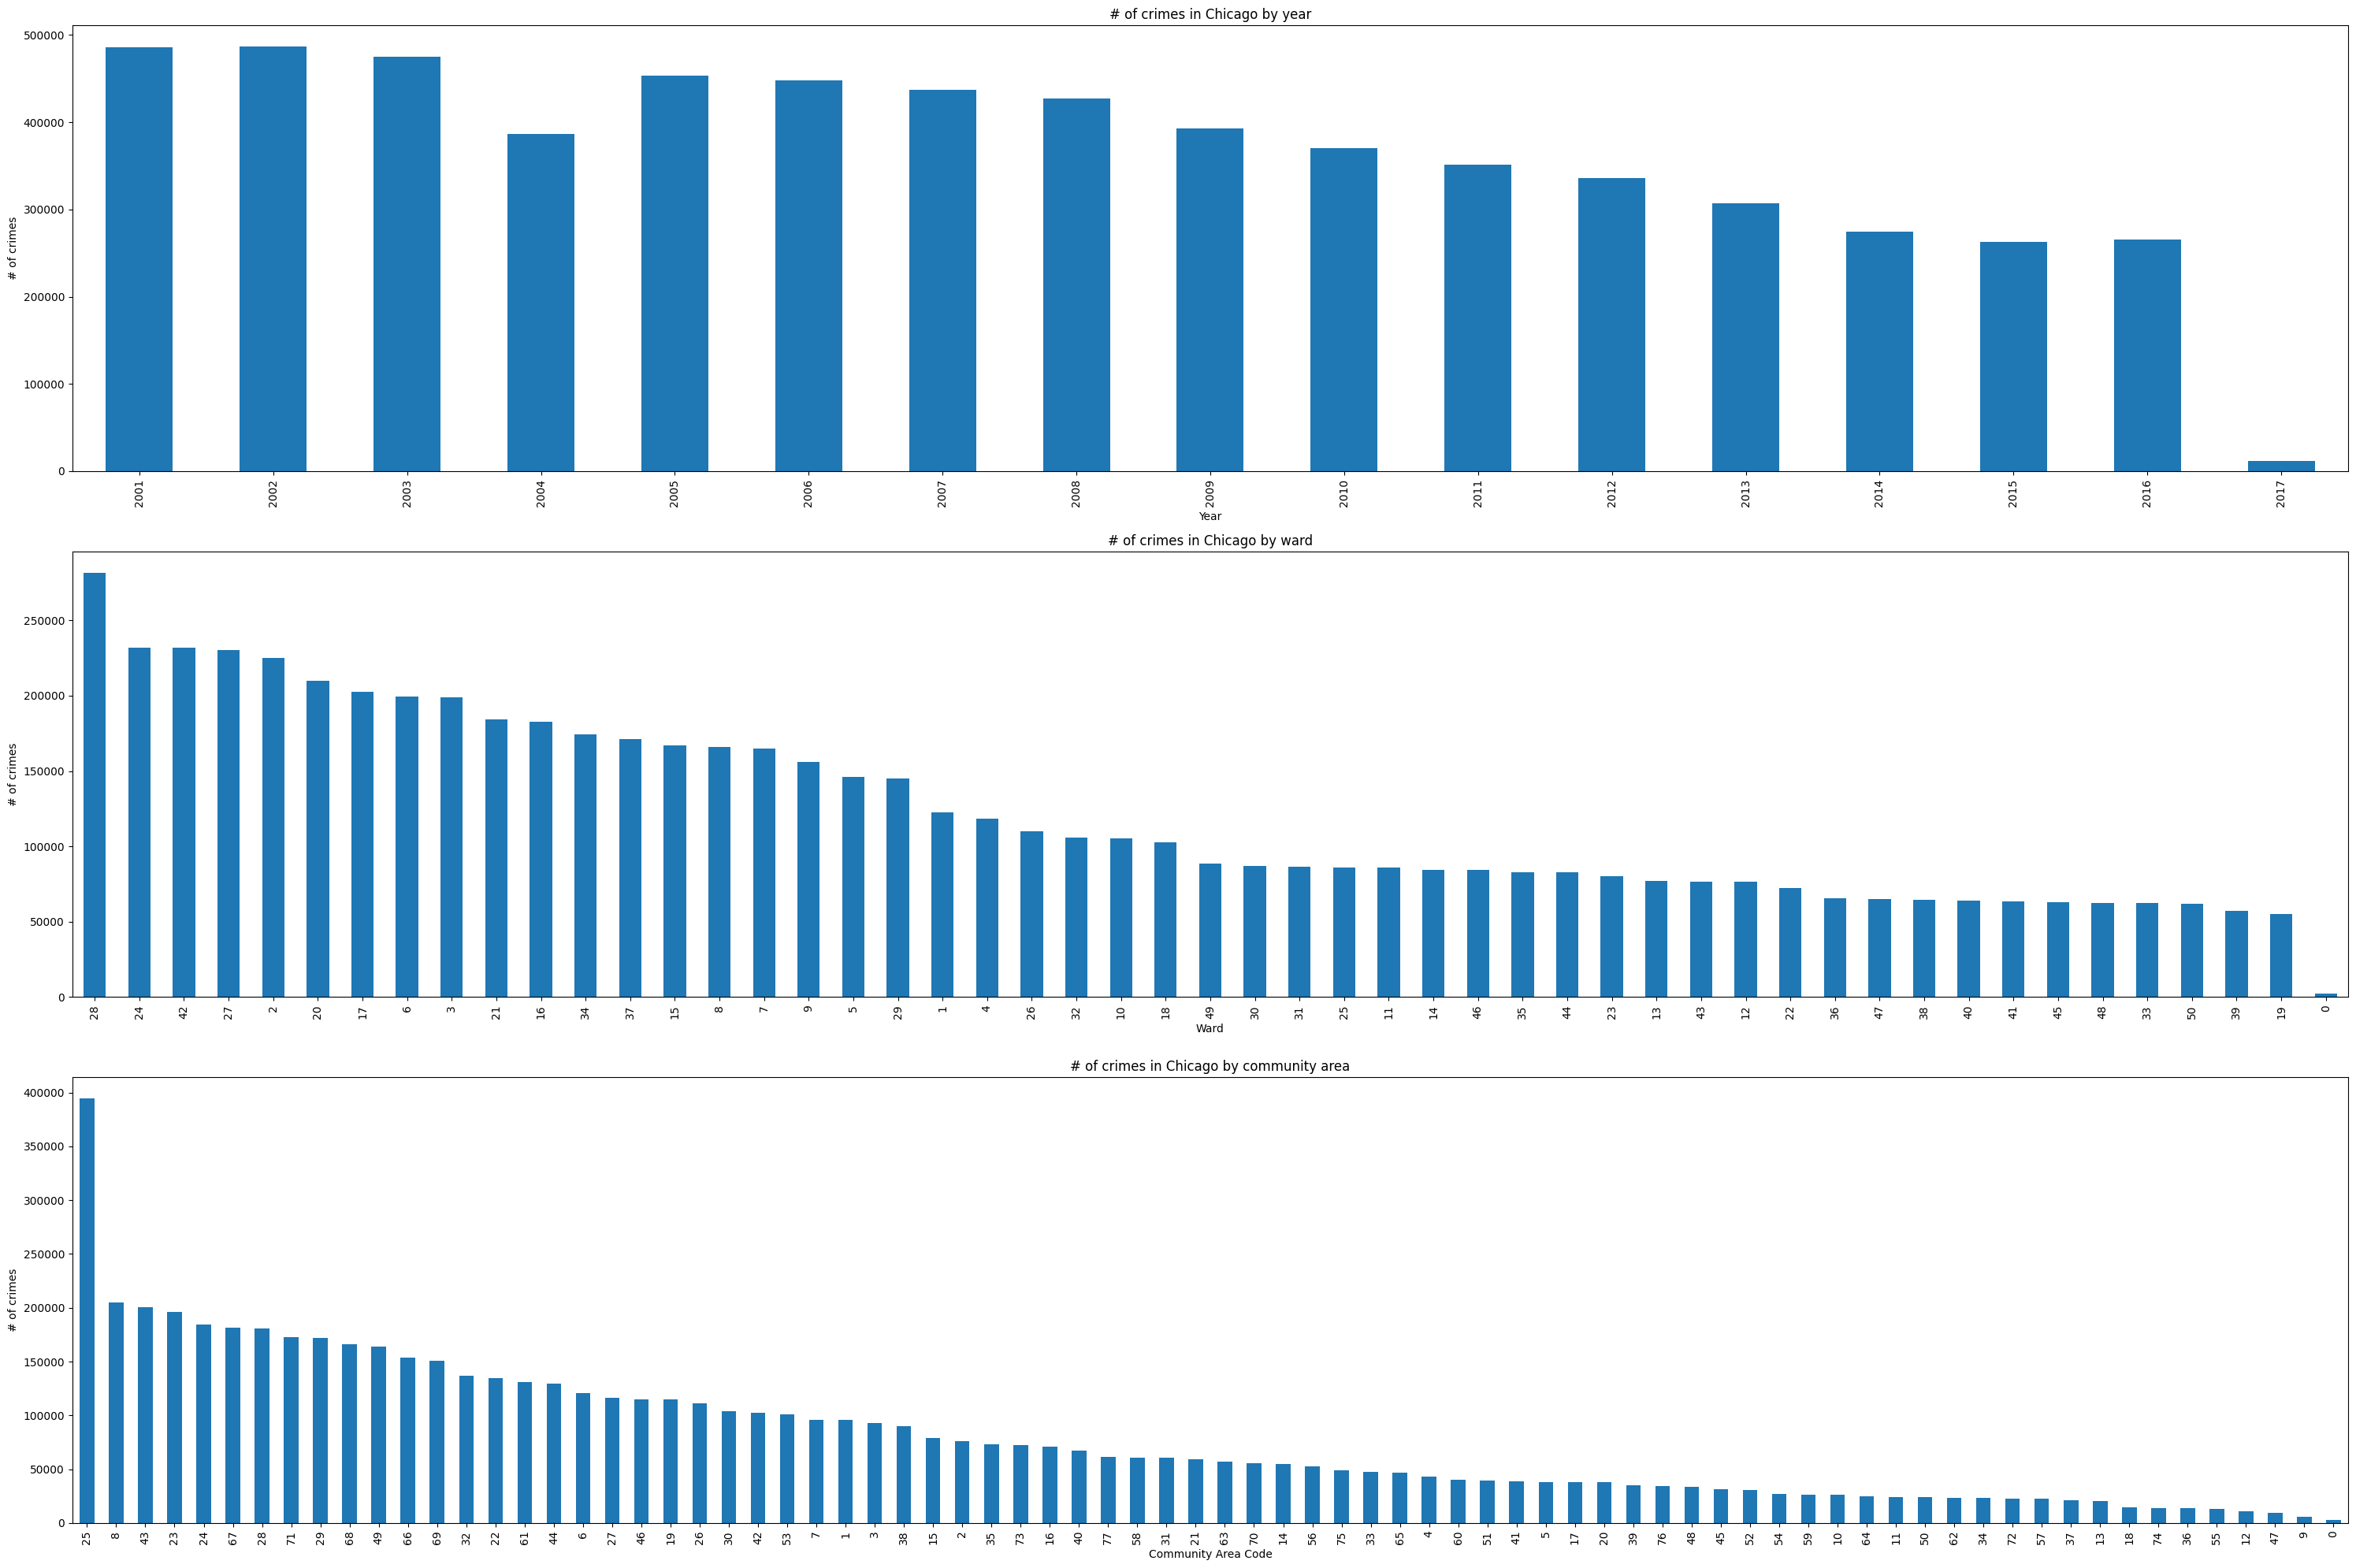

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 20))

plt.subplot(3, 1, 1)
df_y['Year'].value_counts().sort_index().plot(kind='bar')
plt.title('# of crimes in Chicago by year')
plt.ylabel('# of crimes')

plt.subplot(3, 1, 2)
df_y['Ward'].value_counts().plot(kind='bar')
plt.title('# of crimes in Chicago by ward')
plt.ylabel('# of crimes')

plt.subplot(3, 1, 3)
df_y['Community Area Code'].value_counts().plot(kind='bar')
plt.title('# of crimes in Chicago by community area')
plt.ylabel('# of crimes')

plt.tight_layout()

plt.show()

# 가설

## 가설 1. 지역의 경제적 변화 및 도시의 사회적 안전망 강화가 범죄율과 관련 있을 것

### 가설 1-1. 지역 경제 변화가 도시의 범죄율에 유의미한 영향을 줄 것(O)

In [ ]:
# 연도별로 파악한 결과 2017년 자료가 다른 연도에 비해 지나치게 적어 2016년까지만 파악
# 시카고 도시권(위성도시인 엘긴과 네이퍼빌 포함)의 실질 GRDP와 범죄율의 상관관계 분석을 위해 외부 데이터 호출 후 새 데이터프레임 구성

vcy = vcy.drop(index=2017)

grdp = pd.DataFrame({
    'Year' : range(2001, 2017),
    'Crimes' : list(vcy.values),
    'GRDP' : [551911.034, 554209.096, 563001.196, 580916.396, 595469.776, 609831.444, 620077.783, 605115.076,
              584067.845, 595377.258, 606776.758, 624494.553, 629809.475, 644468.362, 659877.954, 665040.292]
})

grdp

,Year,Crimes,GRDP
0,2001,486631,551911.034
1,2002,485694,554209.096
2,2003,474934,563001.196
3,2004,453666,580916.396
4,2005,448037,595469.776
5,2006,436924,609831.444
6,2007,426964,620077.783
7,2008,392556,605115.076
8,2009,386998,584067.845
9,2010,370140,595377.258


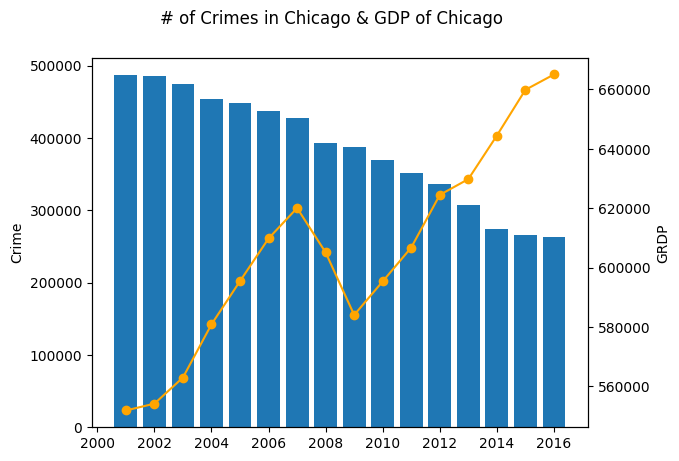

In [ ]:
# GRDP

fig, ax1 = plt.subplots()

ax1.bar(grdp['Year'], grdp['Crimes'], label='Crime')
ax1.set_ylabel('Crime')    # color 지정 가능
ax1.tick_params(axis='y')  # labelcolor 지정 가능

ax2 = ax1.twinx()
ax2.plot(grdp['Year'], grdp['GRDP'], color='orange', marker='o', linestyle='-', label='GRDP')
ax2.set_ylabel('GRDP')
ax2.tick_params(axis='y')

fig.suptitle('# of Crimes in Chicago & GDP of Chicago')

plt.show()

# 상당한 역의 상관관계가 관찰

<Axes: >

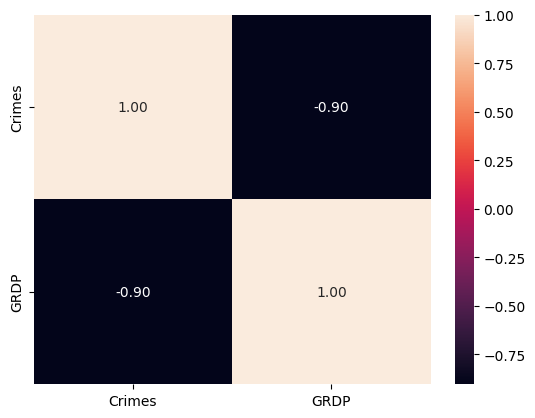

In [ ]:
columns = ['Crimes', 'GRDP']

import seaborn as sns

sns.heatmap(grdp[columns].corr(), fmt='.2f', annot=True)

# -0.9로 매우 강한 역의 상관관계 도출

In [ ]:
# 두 연속변수의 상관관계를 검정하는 피어슨 검정

from scipy.stats import pearsonr

r, p_value = pearsonr(grdp['Crimes'], grdp['GRDP'])
print(f"corr: {r}")
print(f"p-value: {p_value}")

# p값이 극히 낮아 상관관계가 뚜렷하게 존재함을 확인

corr: -0.9038785726341196
p-value: 1.5715514244056283e-06


In [ ]:
import statsmodels.api as sm

# 회귀식 관련 측정 지표인 f-squared 도입

x = grdp['GRDP']
y = grdp['Crimes']

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()


r_squared = model.rsquared

f_squared = r_squared / (1 - r_squared)
print(f"f^2: {f_squared:.2f}")

# f-squared >= 4라면 r²이 최소 0.8이므로 grdp가 범죄 발생 빈도와 매우 강한 상관관계를 갖고 있음을 알 수 있음

f^2: 4.46


In [ ]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 16.7 MB/s eta 0:00:00


### 가설 1-2. 시의 사회 안전망 및 복지 관련 지출이 범죄율과 상관이 있을 것(O)

In [ ]:
# 시카고 사회 안전망 지출 데이터 참고(시 예산 지출 보고서)
df_e = pd.read_excel('Public safety expenditure.xlsx')

df_e

,Year,General Expenditure,Local Grants,Total Expenditure,Percent of Total
0,2001,1345113,NaN,NaN,0.276
1,2002,1420298,NaN,NaN,0.262
2,2003,1566645,23382.0,1590027.0,0.280
3,2004,1540686,34245.0,1574931.0,0.295
4,2005,1546359,15756.0,1562115.0,0.280
5,2006,1783993,64265.0,1848258.0,0.295
6,2007,1845497,31537.0,1877034.0,0.308
7,2008,1856634,33183.0,1889817.0,0.277
8,2009,1862914,47741.0,1910655.0,0.305
9,2010,1828984,77180.0,1906164.0,0.301


In [ ]:
df_s = pd.merge(grdp, df_e, on='Year')

df_s

,Year,Crimes,GRDP,General Expenditure,Local Grants,Total Expenditure,Percent of Total
0,2001,486631,551911.034,1345113,NaN,NaN,0.276
1,2002,485694,554209.096,1420298,NaN,NaN,0.262
2,2003,474934,563001.196,1566645,23382.0,1590027.0,0.280
3,2004,453666,580916.396,1540686,34245.0,1574931.0,0.295
4,2005,448037,595469.776,1546359,15756.0,1562115.0,0.280
5,2006,436924,609831.444,1783993,64265.0,1848258.0,0.295
6,2007,426964,620077.783,1845497,31537.0,1877034.0,0.308
7,2008,392556,605115.076,1856634,33183.0,1889817.0,0.277
8,2009,386998,584067.845,1862914,47741.0,1910655.0,0.305
9,2010,370140,595377.258,1828984,77180.0,1906164.0,0.301


<Axes: >

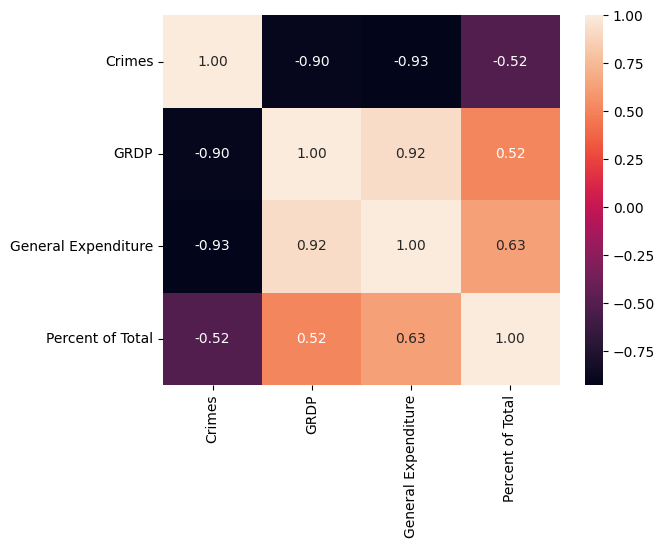

In [ ]:
columns = ['Crimes', 'GRDP', 'General Expenditure', 'Percent of Total']

sns.heatmap(df_s[columns].corr(), fmt='.2f', annot=True)

# 시의 사회 안전망 지출과 범죄 발생 건수 사이에는 강한 역의 상관관계 존재
# GRDP와 Total Expenditure 사이에는 0.92라는 높은 상관계수가 확인돼 다중공선성이 중대함을 확인
# 전체 지출 중 사회 안전망 지출 비율인 Percent of Total을 변수로 선택해도 -0.5 이상의 유의미한 상관관계가 존재하므로 이를 선택하는 것이 나음


In [ ]:
from scipy import *

r_e, p_value_e = stats.pearsonr(df_s['Crimes'], df_s['General Expenditure'])

r_p, p_value_p = stats.pearsonr(df_s['Crimes'], df_s['Percent of Total'])


print('corr e :', r_e)
print('p-value e :', p_value_e)
print()
print('corr p :', r_p)
print('p-value p :', p_value_p)

# 둘 중 어느 것을 사용해도 범죄 건수와 강한 상관관계가 있음을 확인
# 다중공선성이 훨씬 덜한 지출 비율이 모델 사용에는 더 적합할 듯

corr e : -0.9270327104679141
p-value e : 2.431123357138514e-07

corr p : -0.5174951823605567
p-value p : 0.04007037967025533


In [ ]:
x2 = df_s['Percent of Total']
y2 = df_s['Crimes']

x2 = sm.add_constant(x2)
model = sm.OLS(y2, x2).fit()


r_squared = model.rsquared

f_squared = r_squared / (1 - r_squared)
print(f"f^2: {f_squared:.2f}")

# 0.35 이상만 되어도 유의미한 상관관계가 있다고 할 수 있으므로 사회 안전망 지출 비율만으로도 유의한 상관관계가 있음을 확인
# 지역 경제성장만큼 강력한 상관관계를 갖고 있지 않음이 증명

f^2: 0.37


#### 왜 사회 지출에는 비율을 쓰고 지역 총생산에는 그대로 숫자를 썼나?

- 사회 안전망 지출은 다른 경제 지표와 달리 인플레이션을 반영한 조정치가 나와 있지 않음 → 실질 GRDP는 다른 부가적인 조정이 필요하지 않은 수치
- GDP는 민간 경제의 부침에 따라 언제든 현저하게 하락할 수 있으나 정부의 지출이 그만큼 줄어드는 것은 보기 어려움 → 단순히 지출액만 놓고 보면 정부의 지출 관성과 물가 상승으로 인한 영향을 최대한 배제하기 위해 지출에선 변화율 사용
- GRDP는 2000년 자료를 찾아보기 어려움 → 2001년의 GRDP 상승률을 알 수 없어 변화율을 사용하면 차후 모델링에도 좋지 않은 영향을 일으킬 가능성

### 테스트 코드

In [ ]:
# GRDP도 변화율 형태로 변경한다면?
grdp_m = pd.read_excel('GRDP of Chicago by year.xlsx')
grdp_m['Growth Rate of GRDP'] = grdp_m['Growth Rate of GRDP'].round(4)
grdp_m

,Year,Crimes,GRDP,Growth Rate of GRDP
0,2001,486631,551911.034,NaN
1,2002,485694,554209.096,0.0042
2,2003,474934,563001.196,0.0159
3,2004,453666,580916.396,0.0318
4,2005,448037,595469.776,0.0251
5,2006,436924,609831.444,0.0241
6,2007,426964,620077.783,0.0168
7,2008,392556,605115.076,-0.0241
8,2009,386998,584067.845,-0.0348
9,2010,370140,595377.258,0.0194


In [ ]:
df_m = pd.merge(grdp_m, df_e, on='Year')
df_m

,Year,Crimes,GRDP,Growth Rate of GRDP,General Expenditure,Local Grants,Total Expenditure,Percent of Total
0,2001,486631,551911.034,NaN,1345113,NaN,NaN,0.276
1,2002,485694,554209.096,0.0042,1420298,NaN,NaN,0.262
2,2003,474934,563001.196,0.0159,1566645,23382.0,1590027.0,0.280
3,2004,453666,580916.396,0.0318,1540686,34245.0,1574931.0,0.295
4,2005,448037,595469.776,0.0251,1546359,15756.0,1562115.0,0.280
5,2006,436924,609831.444,0.0241,1783993,64265.0,1848258.0,0.295
6,2007,426964,620077.783,0.0168,1845497,31537.0,1877034.0,0.308
7,2008,392556,605115.076,-0.0241,1856634,33183.0,1889817.0,0.277
8,2009,386998,584067.845,-0.0348,1862914,47741.0,1910655.0,0.305
9,2010,370140,595377.258,0.0194,1828984,77180.0,1906164.0,0.301


<Axes: >

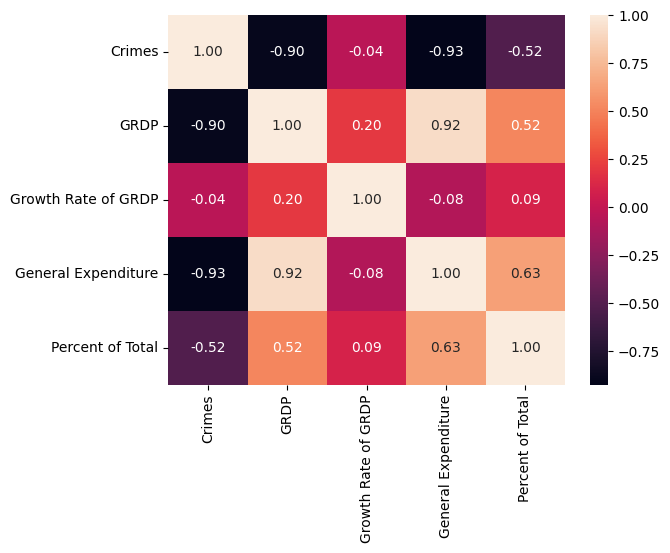

In [ ]:
columns = ['Crimes', 'GRDP', 'Growth Rate of GRDP', 'General Expenditure', 'Percent of Total']

sns.heatmap(df_m[columns].corr(), fmt='.2f', annot=True)

# 변화율을 놓고 보면 범죄 건수와 큰 상관관계가 없음

### 가설 1-3. 시의 실업률이 범죄율과 상관이 있을 것(X)

<Axes: >

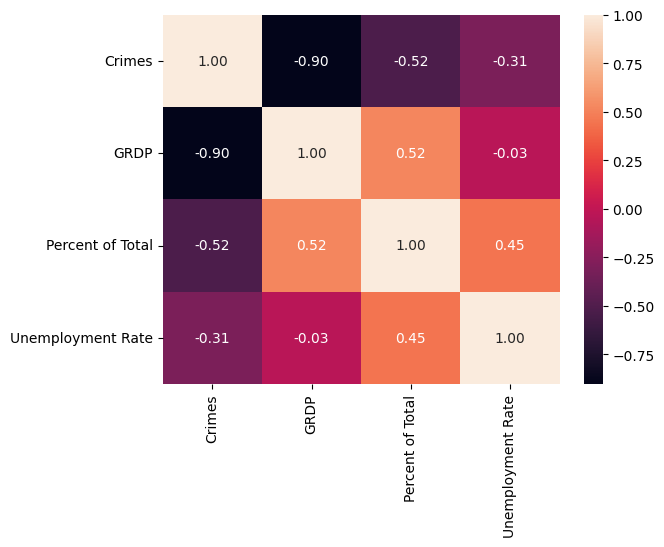

In [ ]:
# 실업률 데이터를 상기 데이터프레임에 직접 삽입(데이터 개수가 적어 직접 입력)

df_s['Unemployment Rate'] = pd.Series([5.6, 6.9, 6.8, 6.3, 6.0, 4.6, 5.0, 6.3,
                                       9.9, 10.5, 10, 9.2, 9.2, 7.2, 6.0, 5.9])

columns = ['Crimes', 'GRDP', 'Percent of Total', 'Unemployment Rate']

sns.heatmap(df_s[columns].corr(), fmt='.2f', annot=True)

# 실업률은 범죄 건수와 상관관계도 낮으며 기대와 달리 오히려 실증적으로는 시카고에서 역의 상관관계가 확인


#### 실업률이 높은 시카고에서 계속 지역 경제 발전이 일어나는 이유?
- 20세기 후반부터 미국 중북부에서 발생한 대대적인 산업 개편으로 일자리 창출 효과가 큰 제조업이 고소득 직종인 금융업 일자리로 대체
- 금융권 등에서 일하는 고소득자의 증가로 전체 GRDP와 1인당 소득은 계속 상승
- 진입장벽이 낮고 연계 산업이 풍부한 제조업 일자리로 들어갈 사람이 부족해져 실업률은 증가한 것으로 보임
- 교육 수준이 상대적으로 낮은 이유 등으로 제조업 일자리 진입이 절실한 이들이 실업자로 남아 범죄에 노출되지 않도록 할 만한 사회적 안전망 구축이 필요

## 가설 2. 시간대별로 강력범죄의 발생 빈도와 체포율이 유의미하게 다를 것

- 경찰서에 교대근무를 하는 최소 인원이 남는 저녁 12시부터 아침 6시까지 범죄 건수가 더 많을 것으로 예상
- 살인, 폭력 등 사람을 대상으로 일어나는 강력범죄의 빈도가 위 시간대에서 특히 높을 것으로 예상
- 범죄 발생 건수와 함께 체포 여부도 체크

### 가설 2-1. 심야에 더 많은 범죄가 발생할 것(O)

In [ ]:
df_h = df_y.copy()

cond = df_h['Date'].str[-2:] == 'AM'
df_ham = df_h[cond]
df_ham['Hour'] = df_ham['Date'].str[11:13].astype('int')

<ipython-input-27-eae12658217e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ham['Hour'] = df_ham['Date'].str[11:13].astype('int')


In [ ]:
df_hpm = df_h[~cond]
df_hpm['Hour'] = df_hpm['Date'].str[11:13].astype('int')

<ipython-input-28-861a66374d4e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hpm['Hour'] = df_hpm['Date'].str[11:13].astype('int')


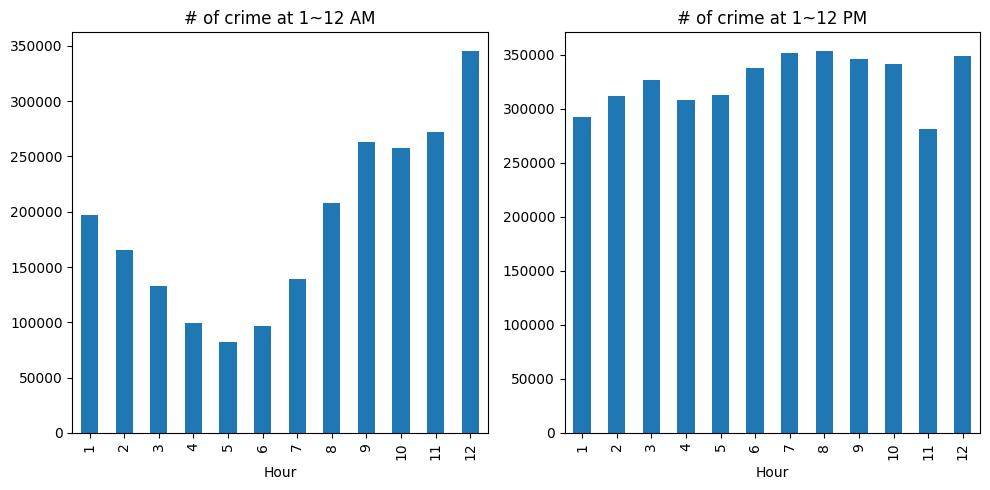

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
df_ham['Hour'].value_counts().sort_index().plot(kind='bar')
plt.title('# of crime at 1~12 AM')

plt.subplot(1, 2, 2)
df_hpm['Hour'].value_counts().sort_index().plot(kind='bar')
plt.title('# of crime at 1~12 PM')

plt.tight_layout()
plt.show()

# 오전 9~11시, 새벽 0시에 가장 범죄 건수가 많음

In [ ]:
# 12 am은 0시로, pm은 12를 제외하고 다른 시간대에 전부 12를 더해 0~24시간제를 만든 다음 다시 concat으로 병합해 한 데이터프레임에 0~23시의 범죄 분포 구간을 나타내기로

def convert_am(x) :
  if x == 12 :
    return 0
  else :
    return x

def convert_pm(x) :
  if x == 12 :
    return x
  else :
    return x + 12

df_ham['Hour'] = df_ham['Hour'].apply(convert_am)
df_hpm['Hour'] = df_hpm['Hour'].apply(convert_pm)

df_ham.info()

<ipython-input-30-2d17422a5bd9>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ham['Hour'] = df_ham['Hour'].apply(convert_am)


<class 'pandas.core.frame.DataFrame'>
Index: 2258461 entries, 0 to 6170810
Data columns (total 22 columns):
 #   Column                Dtype   
---  ------                -----   
 0   ID                    int64   
 1   Case Number           object  
 2   Date                  object  
 3   Block                 object  
 4   IUCR                  object  
 5   Primary Type          object  
 6   Description           object  
 7   Location Description  object  
 8   Arrest                bool    
 9   Domestic              bool    
 10  Beat                  category
 11  District              object  
 12  Ward                  int64   
 13  FBI Code              object  
 14  X Coordinate          object  
 15  Y Coordinate          object  
 16  Year                  int64   
 17  Latitude              float64 
 18  Longitude             float64 
 19  Location              object  
 20  Community Area Code   int64   
 21  Hour                  int64   
dtypes: bool(2), category(1)

<ipython-input-30-2d17422a5bd9>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hpm['Hour'] = df_hpm['Hour'].apply(convert_pm)


In [ ]:
# 시간 순으로 재정렬
df_ham.sort_values(by='Hour', inplace=True)
df_hpm.sort_values(by='Hour', inplace=True)

<ipython-input-31-dbceb46d7eb2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ham.sort_values(by='Hour', inplace=True)
<ipython-input-31-dbceb46d7eb2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hpm.sort_values(by='Hour', inplace=True)


<Axes: xlabel='Hour'>

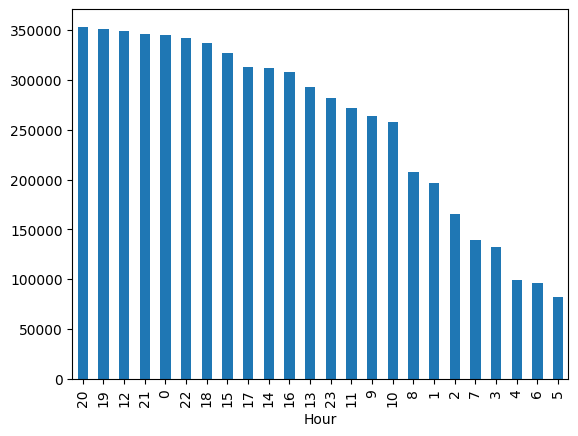

In [ ]:
# 어느 시간대에 가장 범죄 건수가 많은가?

df_t = pd.concat([df_ham, df_hpm])
df_t['Hour'].value_counts().plot(kind='bar')

In [ ]:
df_t['Primary Type'].value_counts()

# 범죄 유형 중 인명과 재산에 심대한 손상을 주는 범죄들을 강력범죄로 규정
violent_crimes = ['CRIM SEXUAL ASSAULT', 'ARSON', 'HOMICIDE', 'KIDNAPPING', 'HUMAN TRAFFICKING']

cond2 = df_t['Primary Type'].isin(violent_crimes)

df_t[cond2].shape[0]  # 16년 동안 48417건의 강력범죄 발생

48417

<Axes: xlabel='Hour'>

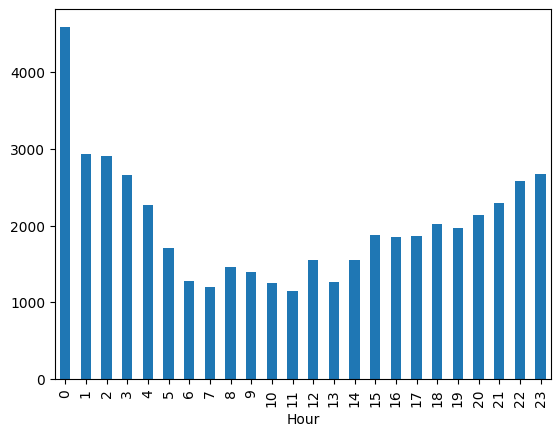

In [ ]:
# 시간대 순서별로 강력범죄 건수 시각화

df_vc = df_t[cond2]

df_vc['Hour'].value_counts().sort_index().plot(kind='bar')

In [ ]:
# 정말 0~6시와 7~23시 사이의 강력범죄 건수 차이가 통계적으로 유의미한가?

import scipy.stats as stats

# 0~6시 시간대의 범죄 발생 건수 (night)
night_counts = df_vc[df_vc['Hour'].between(0, 6)]['Hour'].value_counts()

# 7~23시 시간대의 범죄 발생 건수 (day)
day_counts = df_vc[df_vc['Hour'].between(7, 23)]['Hour'].value_counts()

# 각각의 범죄 발생 건수를 확인
print(night_counts)
print(day_counts)


Hour
0    4588
1    2935
2    2902
3    2659
4    2272
5    1704
6    1281
Name: count, dtype: int64
Hour
23    2668
22    2579
21    2291
20    2143
18    2015
19    1965
15    1879
17    1858
16    1854
12    1557
14    1551
8     1462
9     1393
13    1267
10    1246
7     1195
11    1153
Name: count, dtype: int64


In [ ]:
a, p_value_night = stats.shapiro(night_counts.values)
b, p_value_day = stats.shapiro(day_counts.values)

print('p_value_night :', p_value_night, ' p_value_day :', p_value_day)

# 샤피로 윌크 검정에서 p값이 충분히 낮게 나왔으니 정규성 만족

print(stats.levene(night_counts.values, day_counts.values))

# 레빈 검정 결과에 따라 등분산 가정도 충족하므로 t검정 진행

if p_value_night > 0.05 and p_value_day > 0.05:
    t_stat, p_value = stats.ttest_ind(night_counts.values, day_counts.values, equal_var=True)
    print(f"T-statistic: {t_stat}, p-value: {p_value}")

else:
    print("The data is not normally distributed")

p_value_night : 0.5932118465753788  p_value_day : 0.3136316992505199
LeveneResult(statistic=np.float64(3.251421105322892), pvalue=np.float64(0.08507653871458411))
T-statistic: 2.759720752369161, p-value: 0.011432648479621855


- 가설 : 심야(0~6시)에 더 많은 강력범죄가 발생할 것
- 검정 결과 : t검정에서 유의수준을 하회하는 p값과 양의 검정통계량을 확인

  → 0~6시에 다른 시간대에 비해 많은 강력범죄가 일어난다는 사실을 확인

- 해석 : 심야는 유동인구가 많은 주간 시간대보다 감시하는 눈이 적고 소수의 범죄 타깃을 설정하기 쉽기 때문에 범죄자들이 인명이나 재산을 노리는 강력범죄를 일으킬 유인이 커짐


### 가설 2-2. 심야에 강력범죄 체포율이 현저하게 낮을 것(O)

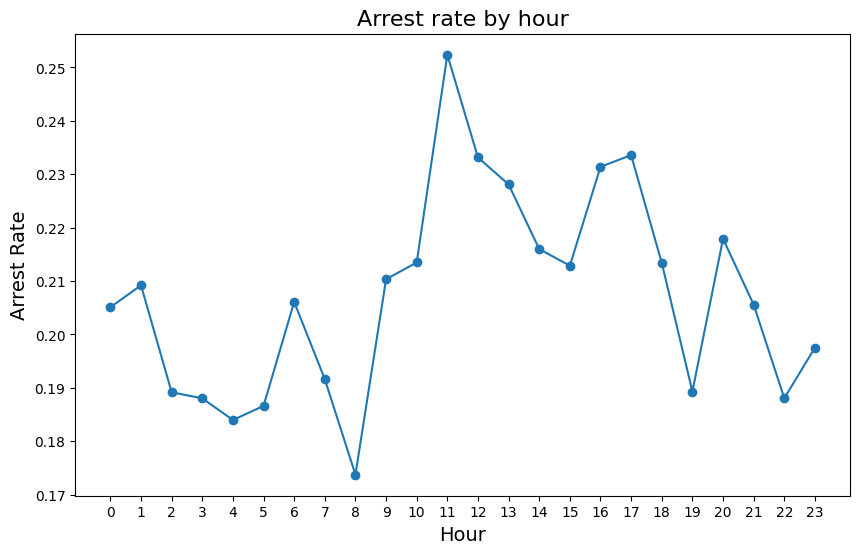

In [ ]:
# 강력범죄의 발생 시간대 분리
# df_vc['Date'] = pd.to_datetime(df_vc['Date'])

arrest_rate = df_vc.groupby('Hour')['Arrest'].mean()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(arrest_rate.index, arrest_rate.values, marker='o')
plt.title('Arrest rate by hour', fontsize=16)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Arrest Rate', fontsize=14)
# plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

# 일단 눈에 띄게 낮은 것을 확인

<Figure size 1200x600 with 0 Axes>

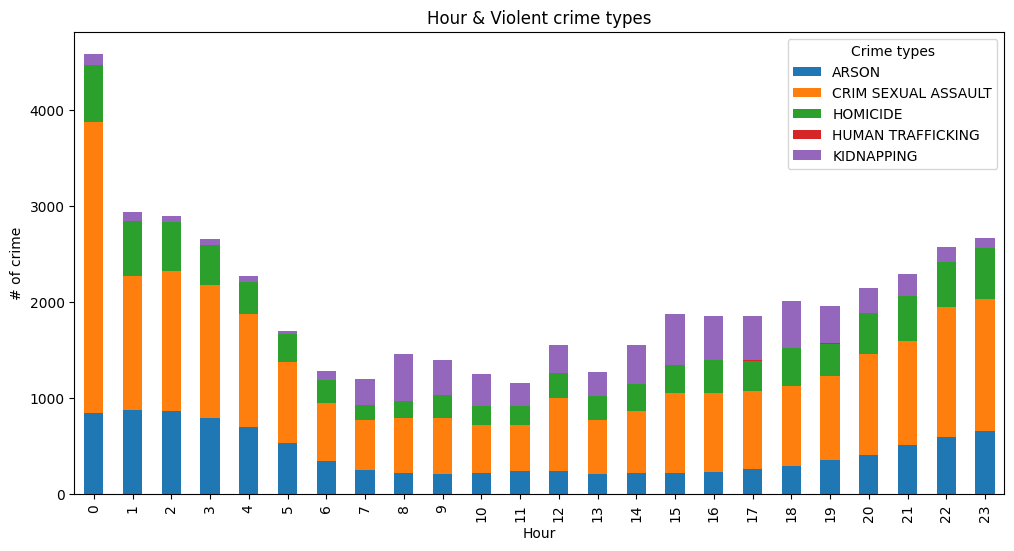

In [ ]:
# 막대 그래프로 범죄 유형별로 구분되게 한 다음 실제로 0~6시와 7~17시 사이 차이가 있는지 확인하기

crime_by_hour = df_vc.groupby(['Hour', 'Primary Type']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))

crime_by_hour.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.xlabel("Hour")
plt.ylabel("# of crime")
plt.title("Hour & Violent crime types")
plt.legend(title="Crime types", loc='best')

plt.show()

# 성폭행, 방화가 0~6시 부분에 집중되어 있음을 확인

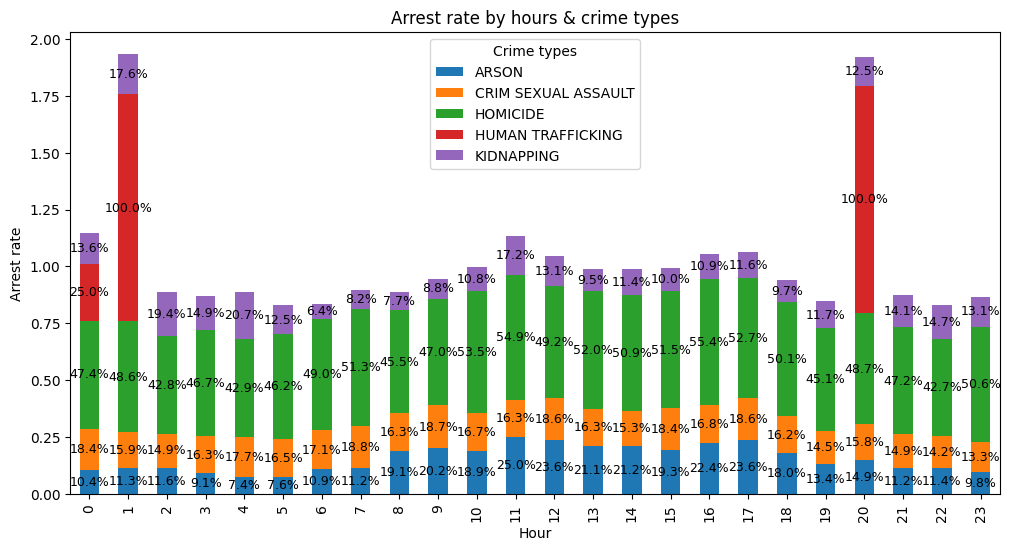

In [ ]:
crime_counts = df_vc.groupby(['Hour', 'Primary Type']).size()
arrest_counts = df_vc[df_vc['Arrest'] == True].groupby(['Hour', 'Primary Type']).size()

arrest_rate = (arrest_counts / crime_counts).unstack(fill_value=0)

ax = arrest_rate.plot(kind='bar', stacked=True, figsize=(12, 6))

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f"{height:.1%}",
                ha="center", va="center", fontsize=9, color="black"
            )

plt.title("Arrest rate by hours & crime types")
plt.xlabel("Hour")
plt.ylabel("Arrest rate")
plt.legend(title="Crime types")
# plt.ylim(0, 1)

plt.show()

In [ ]:
arrest_rate.iloc[:7, :]
# 인신매매는 시간대가 존재하는 곳이 3곳뿐이며 전체 발생 건수가 30회 미만으로 매우 적으므로 나머지 4개의 강력범죄에 대해서만 진행

# 심야(0~6시) vs 기타 시간대 범죄율 데이터의 추출
arrest_rate_a6 = arrest_rate.iloc[:7, :]['ARSON']
arrest_rate_a7 = arrest_rate.iloc[7:, :]['ARSON']

arrest_rate_c6 = arrest_rate.iloc[:7, :]['CRIM SEXUAL ASSAULT']
arrest_rate_c7 = arrest_rate.iloc[7:, :]['CRIM SEXUAL ASSAULT']

arrest_rate_h6 = arrest_rate.iloc[:7, :]['HOMICIDE']
arrest_rate_h7 = arrest_rate.iloc[7:, :]['HOMICIDE']

arrest_rate_k6 = arrest_rate.iloc[:7, :]['KIDNAPPING']
arrest_rate_k7 = arrest_rate.iloc[7:, :]['KIDNAPPING']

# 샤피로 윌크 검정으로 각 데이터의 정규성 체크(모두 정규성 충족)
_, p_value_a6 = stats.shapiro(arrest_rate_a6)
_, p_value_a7 = stats.shapiro(arrest_rate_a7)

_, p_value_c6 = stats.shapiro(arrest_rate_c6)
_, p_value_c7 = stats.shapiro(arrest_rate_c7)

_, p_value_h6 = stats.shapiro(arrest_rate_h6)
_, p_value_h7 = stats.shapiro(arrest_rate_h7)

_, p_value_k6 = stats.shapiro(arrest_rate_k6)
_, p_value_k7 = stats.shapiro(arrest_rate_k7)

print('p_value_a6 :', p_value_a6, 'p_value_a7 :', p_value_a7)
print('p_value_c6 :', p_value_c6,'p_value_c7 :', p_value_c7)
print('p_value_h6 :',p_value_h6,'p_value_h7 :', p_value_h7)
print('p_value_k6 :',p_value_k6,'p_value_k7 :', p_value_k7)

p_value_a6 : 0.2437873854655292 p_value_a7 : 0.1336711947773933
p_value_c6 : 0.9886270343707867 p_value_c7 : 0.2246259248358411
p_value_h6 : 0.20621764892958372 p_value_h7 : 0.8997716194277485
p_value_k6 : 0.7267501888052119 p_value_k7 : 0.8449233317885483


In [ ]:
# 등분산 가정을 검정하기 위해 레빈 검정 수행

print('arson :', stats.levene(arrest_rate_a6, arrest_rate_a7))
print('crim sexual assault :', stats.levene(arrest_rate_c6, arrest_rate_c7))
print('homicide :', stats.levene(arrest_rate_h6, arrest_rate_h7))
print('kidnap :', stats.levene(arrest_rate_k6, arrest_rate_k7))

# 방화에서 이분산성이 발견되어 방화에서만 웰치 검정 수행

arson : LeveneResult(statistic=np.float64(4.7620295953013185), pvalue=np.float64(0.04005674161909214))
crim sexual assault : LeveneResult(statistic=np.float64(1.0617330265787746), pvalue=np.float64(0.3140159854577016))
homicide : LeveneResult(statistic=np.float64(0.9027535345906919), pvalue=np.float64(0.3523664340470317))
kidnap : LeveneResult(statistic=np.float64(3.5290040447732176), pvalue=np.float64(0.07362029836989706))


In [ ]:
# 방화만 이분산성을 가정한 웰치 t검정을 수행하고 나머지 항목들은 일반 t검정 수행

t_stat_a, p_value_a = stats.ttest_ind(arrest_rate_a6, arrest_rate_a7, equal_var=False)
p_value_a_one_sided = p_value_a / 2 if t_stat_a > 0 else p_value_a
print(f"ARSON - T-statistic: {t_stat_a}, One-sided p-value: {p_value_a_one_sided}")

t_stat_c, p_value_c = stats.ttest_ind(arrest_rate_c6, arrest_rate_c7)
p_value_c_one_sided = p_value_c / 2 if t_stat_c > 0 else p_value_c
print(f"CRIM SEXUAL ASSAULT - T-statistic: {t_stat_c}, One-sided p-value: {p_value_c_one_sided}")

t_stat_h, p_value_h = stats.ttest_ind(arrest_rate_h6, arrest_rate_h7)
p_value_h_one_sided = p_value_h / 2 if t_stat_h > 0 else p_value_h
print(f"HOMICIDE - T-statistic: {t_stat_h}, One-sided p-value: {p_value_h_one_sided}")

t_stat_k, p_value_k = stats.ttest_ind(arrest_rate_k6, arrest_rate_k7)
p_value_k_one_sided = p_value_k / 2 if t_stat_k > 0 else p_value_k
print(f"KIDNAPPING - T-statistic: {t_stat_k}, One-sided p-value: {p_value_k_one_sided}")

# 성폭행은 시간대 구간별로 큰 상관이 없는 것으로 확인
# 방화 및 살인이 심야에 더 자주 발생하며 납치는 기타 시간대에 더 많이 발생

ARSON - T-statistic: -5.945408763909546, One-sided p-value: 5.792579342337831e-06
CRIM SEXUAL ASSAULT - T-statistic: 0.3301098066797, One-sided p-value: 0.3722199173536255
HOMICIDE - T-statistic: -2.489743401831193, One-sided p-value: 0.020828141798783482
KIDNAPPING - T-statistic: 2.384967304850971, One-sided p-value: 0.013063033905866961


In [ ]:
# 비교를 위한 평균 확인
arrest_rate_a6m = arrest_rate.iloc[:7, :]['ARSON'].mean()
arrest_rate_a7m = arrest_rate.iloc[7:, :]['ARSON'].mean()

arrest_rate_c6m = arrest_rate.iloc[:7, :]['CRIM SEXUAL ASSAULT'].mean()
arrest_rate_c7m = arrest_rate.iloc[7:, :]['CRIM SEXUAL ASSAULT'].mean()

arrest_rate_h6m = arrest_rate.iloc[:7, :]['HOMICIDE'].mean()
arrest_rate_h7m = arrest_rate.iloc[7:, :]['HOMICIDE'].mean()

arrest_rate_k6m = arrest_rate.iloc[:7, :]['KIDNAPPING'].mean()
arrest_rate_k7m = arrest_rate.iloc[7:, :]['KIDNAPPING'].mean()

print(arrest_rate_a6m, arrest_rate_a7m)
print(arrest_rate_c6m, arrest_rate_c7m)
print(arrest_rate_h6m, arrest_rate_h7m)
print(arrest_rate_k6m, arrest_rate_k7m)

0.0976814223438345 0.17890833759746103
0.1669110886423184 0.16456973567936023
0.4623027845470471 0.4989622600713466
0.150171104747935 0.11480465697739768


In [ ]:
cohen_da = pg.compute_effsize(arrest_rate_a6, arrest_rate_a7, eftype='cohen')
print(f"Cohen's d of arson: {cohen_da:.2f}")

cohen_dc = pg.compute_effsize(arrest_rate_c6, arrest_rate_c7, eftype='cohen')
print(f"Cohen's d of crim sexual assault: {cohen_dc:.2f}")

cohen_dh = pg.compute_effsize(arrest_rate_h6, arrest_rate_h7, eftype='cohen')
print(f"Cohen's d of homicide: {cohen_dh:.2f}")

cohen_dk = pg.compute_effsize(arrest_rate_k6, arrest_rate_k7, eftype='cohen')
print(f"Cohen's d of kidnapping: {cohen_dk:.2f}")


# cohen's d의 절대값이 성폭행을 제외하고 모두 0.8 이상으로 검정의 강도도 전반적으로 아주 강함
# 성폭행은 시간대별로 체포율 차이가 없는 수준이지만 납치는 오히려 주간에 더 빈번하게 발생

Cohen's d of arson: -1.88
Cohen's d of crim sexual assault: 0.15
Cohen's d of homicide: -1.12
Cohen's d of kidnapping: 1.07


- 가설 : 심야에 강력범죄 체포율이 유의미하게 낮을 것
- 검정 결과 : 성폭행이 낮은 p값을 기록, 납치는 양의 검정통계량이 검출

  → 범죄별로 차이가 있으며 살인, 방화 등 특히 심대한 피해를 끼치는 범죄의 체포율이 다른 시간에 비해 상당히 낮음을 확인

  → 심야는 강력범죄의 발생 회수가 많고 살인, 방화는 체포율도 낮은 취약한 시간대이므로 이 시간대의 경찰력을 강화할 만한 대안을 마련해야 함
  
  → 성폭행은 심야 체포율이 떨어지진 않으나 심야에 발생 건수가 많은 편이므로 발생을 근본적으로 억제할 만한 방법을 고안해야 함

# 테스트 결과

- 가설 1 : 연도를 기준으로 groupby한 다음 연도별 건수[연속변수]와 외부 변수인 GRDP, 시 사회안전 지출 자료 활용[연속변수] :
상관계수와 피어슨 검정 → 지역 경제의 성장 및 도시의 사회 안전망 지출과 범죄 발생 사이에는 강한 역의 상관관계가 존재함을 확인

- 가설 2-1 : 방화, 인신매매, 성폭행, 살인, 납치를 강력범죄로 규정해 PRIMARY TYPE을 기준으로 필터링 /
심야 시간대(0-6시 발생)와 기타 시간대의 평균 강력범죄 건수[연속변수] 비교 :
샤피로 윌크 ~ 레빈 ~ 단측 t검정 → 0~6시에 발생한 강력범죄는 다른 시간대에 비해 전반적으로 발생 건수도 많고 체포율도 낮음을 확인

- 가설 2-2 : 강력범죄의 체포율을 ARREST 칼럼에서 평균값을 추출해 심야 시간대와 기타 시간대의 평균 체포율[연속변수]을 범죄별로 비교 :
샤피로 윌크 ~ 레빈 ~ 단측 t검정 → 0~6시에 발생한 강력범죄는 성폭행을 제외하고 모두 체포율이 다른 시간대에 비해 유의미하게 낮다는 것을 확인(p값 0.05 이하)

- 그러면? : 도시의 균등한 경제 발전과 사회 안전망 유지에 노력해 전반적인 범죄 건수를 낮추고 심야 구간의 경찰력을 강화해 강력범죄를 억제할 필요

#### 테스트 코드

In [ ]:
# 두 데이터셋의 중앙값과 분포가 유의미하게 다른지 판별하는 맨 위트니 u 검정 진행

from scipy.stats import mannwhitneyu

u_stat, p_mwu = mannwhitneyu(night_counts.values, day_counts.values, alternative='two-sided')
print(f"Mann-Whitney U Test: U-statistic={u_stat}, p-value={p_mwu}")

Mann-Whitney U Test: U-statistic=93.0, p-value=0.033723967362411296


In [ ]:
df_vc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48417 entries, 6170722 to 1198
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    48417 non-null  int64         
 1   Case Number           48417 non-null  object        
 2   Date                  48417 non-null  datetime64[ns]
 3   Block                 48417 non-null  object        
 4   IUCR                  48417 non-null  object        
 5   Primary Type          48417 non-null  object        
 6   Description           48417 non-null  object        
 7   Location Description  48417 non-null  object        
 8   Arrest                48417 non-null  bool          
 9   Domestic              48417 non-null  bool          
 10  Beat                  48417 non-null  category      
 11  District              48417 non-null  object        
 12  Ward                  48417 non-null  int64         
 13  FBI Code        

# 체크 리스트

- 불러온 파일에는 unknown 데이터가 다수 존재 → 안 쓸 칼럼에 들어가 있는 것은 괜찮지만 써야 할 칼럼에 unknown이 들어가 있으면?
- ID, case number는 유효한 정보가 아니며 Location은 파생 칼럼에 불과하므로 머신러닝 등에 필요치 않음 → 삭제 요망
- FBI 코드나 primary type만 쓸 것이라면 iucr도 불필요하니 모델 돌리기 전에 삭제해도 ok
- 가설 중에 시간을 활용한 것이 많으니 Hour 칼럼을 분리해서 활용한 데이터셋으로 준비하는 것이 유리할 것
- 수량적 의미가 없는 칼럼인 ward 등은 category로 데이터 타입 변경

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6170813 entries, 0 to 6170812
Data columns (total 21 columns):
 #   Column                Dtype   
---  ------                -----   
 0   ID                    int64   
 1   Case Number           object  
 2   Date                  object  
 3   Block                 object  
 4   IUCR                  object  
 5   Primary Type          object  
 6   Description           object  
 7   Location Description  object  
 8   Arrest                bool    
 9   Domestic              bool    
 10  Beat                  category
 11  District              object  
 12  Ward                  object  
 13  FBI Code              object  
 14  X Coordinate          object  
 15  Y Coordinate          object  
 16  Year                  int64   
 17  Latitude              object  
 18  Longitude             object  
 19  Location              object  
 20  Community Area Code   category
dtypes: bool(2), category(2), int64(2), object(15)
memory u

In [ ]:
# Ward에 숫자 & 문자형 섞여 있고 unknown도 있음
df['Ward'].unique()

# community area code에 숫자 & 문자형 섞여 있음
df['Community Area Code'].unique()

# 위경도에 unknown 섞여 있음
df['Latitude']=df['Latitude'].astype('float')



ValueError: could not convert string to float: 'unknown'

In [ ]:
df.describe(include='O')

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,District,Ward,FBI Code,X Coordinate,Y Coordinate,Latitude,Longitude,Location
count,6170813,6170813,6170813,6170813,6170813,6170813,6170813,6170813.0,6170813.0,6170813,6.170813e+06,6.170813e+06,6.170813e+06,6.170813e+06,6170813
unique,6170473,2451622,58776,398,35,376,173,50.0,101.0,26,1.201631e+06,1.201615e+06,1.200506e+06,1.199883e+06,840086
top,HZ140230,01/01/2008 12:01:00 AM,100XX W OHARE ST,0820,THEFT,SIMPLE,STREET,8.0,28.0,06,1.100658e+06,1.934241e+06,4.197629e+01,-8.790523e+01,"(41.976290414, -87.905227221)"
freq,6,286,14499,496710,1284608,732372,1637391,395319.0,184746.0,1284608,6.914000e+03,6.914000e+03,6.914000e+03,6.914000e+03,12636


In [ ]:
narcotic_types = ['NARCOTICS', 'OTHER NARCOTIC VIOLATION']
df_narcotics = df[df['Primary Type'].isin(narcotic_types)]
df_narcotics.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,District,Ward,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Community Area Code
171,4927931,HK591078,08/30/2004 01:04:00 PM,056XX S ABERDEEN ST,1822,NARCOTICS,MANU/DEL:CANNABIS OVER 10 GMS,OTHER,True,False,...,7.0,16.0,18,1169942.9999167745,1867476.9999443416,2004,41.791852481,-87.652384624,"(41.791852481, -87.652384624)",68
174,4927932,HK764272,11/21/2004 02:36:05 AM,067XX S UNION AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,OTHER,True,False,...,7.0,6.0,18,1172897.0001109687,1860290.0001402225,2004,41.772065828,-87.641764814,"(41.772065828, -87.641764814)",68
176,4928434,HK820830,12/21/2004 12:19:20 PM,071XX S GREEN ST,2017,NARCOTICS,MANU/DELIVER:CRACK,OTHER,True,False,...,7.0,17.0,18,1171869.0000133768,1857607.9998905784,2004,41.764728716,-87.645611748,"(41.764728716, -87.645611748)",68
179,4927678,HK165415,02/05/2004 12:59:29 AM,069XX S WINCHESTER AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,...,7.0,17.0,18,1164551.999884236,1858744.0001524943,2004,41.768003462,-87.672398624,"(41.768003462, -87.672398624)",67
180,4927723,HK147918,01/26/2004 10:29:57 PM,016XX W 61ST ST,2027,NARCOTICS,POSS: CRACK,STREET,True,False,...,7.0,15.0,18,1166240.0000936503,1864253.0000089733,2004,41.78308511,-87.666054626,"(41.78308511, -87.666054626)",67


<Axes: xlabel='Year'>

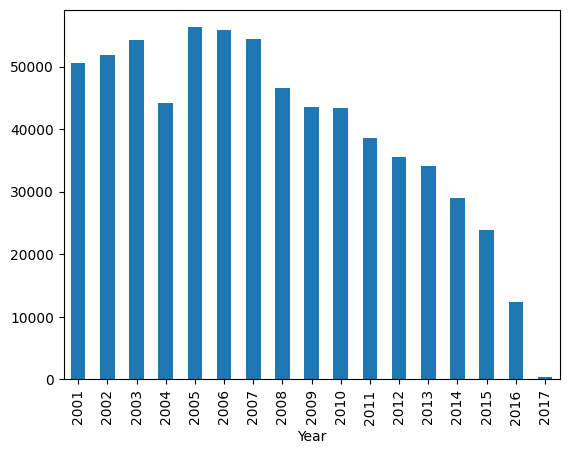

In [ ]:
df_narcotics['Year'].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='Year'>

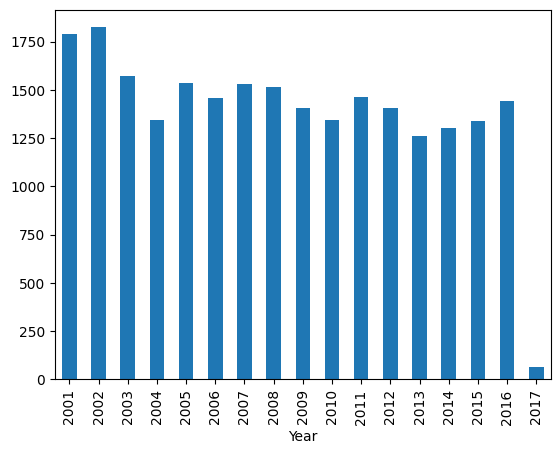

In [ ]:
df_v = df[df['Primary Type'] == 'CRIM SEXUAL ASSAULT']
df_v['Year'].value_counts().sort_index().plot(kind='bar')

TypeError: unsupported operand type(s) for /: 'int' and 'Axes'

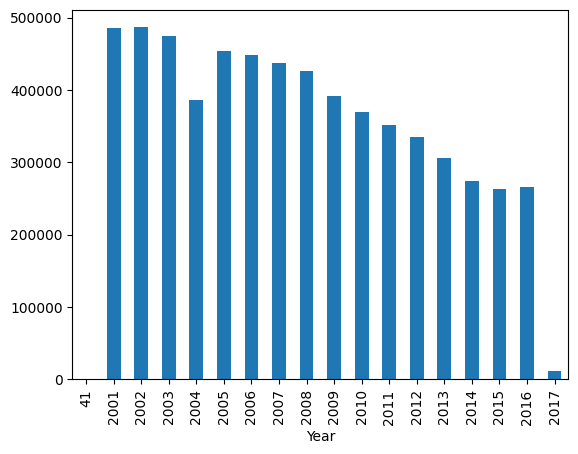

In [ ]:
a = df['Year'].value_counts().sort_index()
b= df_narcotics['Year'].value_counts().sort_index()
b/a.plot(kind='bar')

In [ ]:
a

,count
Year,
41,1
2001,485693
2002,486631
2003,474934
2004,386998
2005,453666
2006,448037
2007,436924
2008,426964
